In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [23]:
def discounted_cost(x, gamma=0.99):
    dis_cost = 0
    for i,  d in enumerate(x[::-1]):
        dis_cost += (gamma**i) * d
    return dis_cost

# Scenario - Baseline

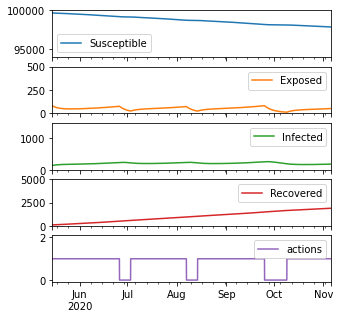

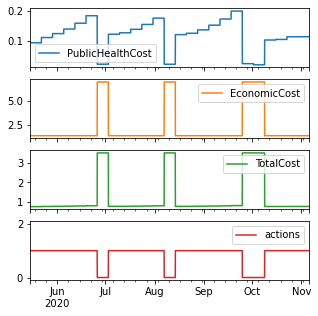

-0.5090288713636961

In [24]:
Scenarios = [ 'BaseLine', 'Senario_1', 'Senario_2']
states = ['Susceptible', 'Exposed', 'Infected', 'Recovered']
a_map = {0:'LockDown', 1:'Social Distancing', 2:'Open'}
cols = []
path = r"C:\Users\kkris\Documents\GitHub\sb3-seir2\results\Scenario-0\sar.csv"
df_0 = pd.read_csv(path,  index_col=0, infer_datetime_format=True)
df_0.index = pd.to_datetime(df_0.index)
eco_costs    = np.array([1., 0.2, 0.0], dtype=float)
df_0['EconomicCost'] = df_0['actions'].map(lambda x: eco_costs[x])*7.
def Bed_cost(x):
    avail_hospital_beds = 0.005*1e5
    return 0. if x < avail_hospital_beds else 100.
df_0['bedcost'] = df_0['Infected'].map(lambda x: Bed_cost(x))
df_0.head()
Susceptible = df_0['Susceptible'].values
dt           = 5/(24*60)
Ts           = 7
time_steps   = int((Ts) / dt)
def ds_cost(Susceptible):
    ds = []
    l            = np.shape(Susceptible)[0]
    weakly_sus = Susceptible[::time_steps]
    for i in range(24):
        for _ in range(time_steps):
            ds.append(weakly_sus[i]-weakly_sus[i+1])
    for _ in range(time_steps):
        ds.append(weakly_sus[i]-weakly_sus[i+1])
    return ds
df_0['Ds_cost'] = np.array(ds_cost(Susceptible))/600.
df_0['PublicHealthCost'] = df_0['bedcost'] + df_0['Ds_cost']
df_0['TotalCost'] = (1-0.5)*df_0['PublicHealthCost'] + (0.5)*df_0['EconomicCost']

index = pd.date_range("2020-05-15 00:00:00", "2020-11-05 23:55:00", freq="5min")
main_title = "weight = " + str(0.5) + ", "
ax = df_0[['Susceptible', 'Exposed', 'Infected', 'Recovered', 'actions']].plot.line(subplots=True, figsize = (5,5))
ax[0].set_ylim([94000, 100000])
ax[1].set_ylim([0, 500])
ax[2].set_ylim([0, 1500])
ax[3].set_ylim([0, 5000])
ax[4].set_ylim([-0.1, 2.1])
plt.savefig(main_title+"Scenario - Baseline - states.jpg")
plt.show()
plt.close()

index = pd.date_range("2020-05-15 00:00:00", "2020-11-05 23:55:00", freq="5min")
main_title = "weight = " + str(0.5) + ", "
ax = df_0[['PublicHealthCost', 'EconomicCost', 'TotalCost', 'actions']].plot.line(subplots=True, figsize = (5,5))
# ax[0].set_ylim([94000, 100000])
# ax[1].set_ylim([0, 500])
# ax[2].set_ylim([0, 1500])
ax[3].set_ylim([-0.1, 2.1])
plt.savefig(main_title+"Scenario - Baseline - costs.jpg")
plt.show()
plt.close()
discounted_cost(df_0['TotalCost'].values)

In [25]:
discounted_cost(df_0['TotalCost'].values)

75.71721711127309

# Scenario -- 1

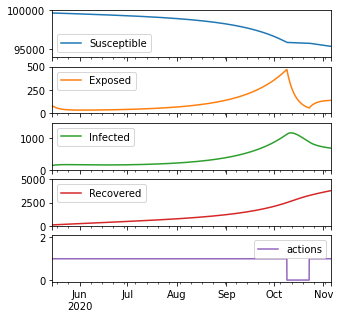

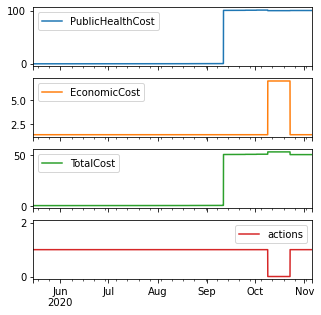

5087.7098789309075

In [26]:
Scenarios = [ 'BaseLine', 'Senario_1', 'Senario_2']
states = ['Susceptible', 'Exposed', 'Infected', 'Recovered']
a_map = {0:'LockDown', 1:'Social Distancing', 2:'Open'}
cols = []
path = r"C:\Users\kkris\Documents\GitHub\sb3-seir2\results\Scenario-1\sar.csv"
path = r"C:\Users\kkris\Documents\GitHub\sb3-seir2\test_name=test_crc_3\w=0.5\seed=3562\Senario=1\hcs=600.0\rpw=0.02\hbr=0.005\mhc=100.0\sar.csv"
df_0 = pd.read_csv(path,  index_col=0, infer_datetime_format=True)
df_0.index = pd.to_datetime(df_0.index)
eco_costs    = np.array([1., 0.2, 0.0], dtype=float)
df_0['EconomicCost'] = df_0['actions'].map(lambda x: eco_costs[x])*7.
def Bed_cost(x):
    avail_hospital_beds = 0.005*1e5
    return 0. if x < avail_hospital_beds else 100.
df_0['bedcost'] = df_0['Infected'].map(lambda x: Bed_cost(x))
df_0.head()
Susceptible = df_0['Susceptible'].values
dt           = 5/(24*60)
Ts           = 7
time_steps   = int((Ts) / dt)
def ds_cost(Susceptible):
    ds = []
    l            = np.shape(Susceptible)[0]
    weakly_sus = Susceptible[::time_steps]
    for i in range(24):
        for _ in range(time_steps):
            ds.append(weakly_sus[i]-weakly_sus[i+1])
    for _ in range(time_steps):
        ds.append(weakly_sus[i]-weakly_sus[i+1])
    return ds
df_0['Ds_cost'] = np.array(ds_cost(Susceptible))/600.
df_0['PublicHealthCost'] = df_0['bedcost'] + df_0['Ds_cost']
df_0['TotalCost'] = (1-0.5)*df_0['PublicHealthCost'] + (0.5)*df_0['EconomicCost']

index = pd.date_range("2020-05-15 00:00:00", "2020-11-05 23:55:00", freq="5min")
main_title = "weight = " + str(0.5) + ", "
ax = df_0[['Susceptible', 'Exposed', 'Infected', 'Recovered', 'actions']].plot.line(subplots=True, figsize = (5,5))
ax[0].set_ylim([94000, 100000])
ax[1].set_ylim([0, 500])
ax[2].set_ylim([0, 1500])
ax[3].set_ylim([0, 5000])
ax[4].set_ylim([-0.1, 2.1])
plt.savefig(main_title+"Scenario - 1 - states.jpg")
plt.show()
plt.close()

index = pd.date_range("2020-05-15 00:00:00", "2020-11-05 23:55:00", freq="5min")
main_title = "weight = " + str(0.5) + ", "
ax = df_0[['PublicHealthCost', 'EconomicCost', 'TotalCost', 'actions']].plot.line(subplots=True, figsize = (5,5))
# ax[0].set_ylim([94000, 100000])
# ax[1].set_ylim([0, 500])
# ax[2].set_ylim([0, 1500])
ax[3].set_ylim([-0.1, 2.1])
plt.savefig(main_title+"Scenario - 1 - costs.jpg")
plt.show()
plt.close()
discounted_cost(df_0['TotalCost'].values)

# Scenario - 2

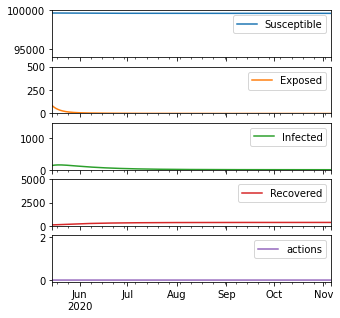

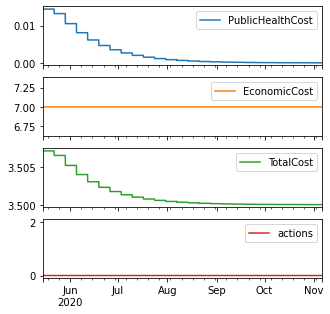

350.0015632642522

In [27]:
Scenarios = [ 'BaseLine', 'Senario_1', 'Senario_2']
states = ['Susceptible', 'Exposed', 'Infected', 'Recovered']
a_map = {0:'LockDown', 1:'Social Distancing', 2:'Open'}
cols = []
path = r"C:\Users\kkris\Documents\GitHub\sb3-seir2\results\Scenario-2\sar.csv"
path = r"C:\Users\kkris\Documents\GitHub\sb3-seir2\test_name=test_crc_3\w=0.5\seed=3562\Senario=2\hcs=600.0\rpw=0.02\hbr=0.005\mhc=100.0\sar.csv"
df_0 = pd.read_csv(path,  index_col=0, infer_datetime_format=True)
df_0.index = pd.to_datetime(df_0.index)
eco_costs    = np.array([1., 0.2, 0.0], dtype=float)
df_0['EconomicCost'] = df_0['actions'].map(lambda x: eco_costs[x])*7.
def Bed_cost(x):
    avail_hospital_beds = 0.005*1e5
    return 0. if x < avail_hospital_beds else 100.
df_0['bedcost'] = df_0['Infected'].map(lambda x: Bed_cost(x))
df_0.head()
Susceptible = df_0['Susceptible'].values
dt           = 5/(24*60)
Ts           = 7
time_steps   = int((Ts) / dt)
def ds_cost(Susceptible):
    ds = []
    l            = np.shape(Susceptible)[0]
    weakly_sus = Susceptible[::time_steps]
    for i in range(24):
        for _ in range(time_steps):
            ds.append(weakly_sus[i]-weakly_sus[i+1])
    for _ in range(time_steps):
        ds.append(weakly_sus[i]-weakly_sus[i+1])
    return ds
df_0['Ds_cost'] = np.array(ds_cost(Susceptible))/600.
df_0['PublicHealthCost'] = df_0['bedcost'] + df_0['Ds_cost']
df_0['TotalCost'] = (1-0.5)*df_0['PublicHealthCost'] + (0.5)*df_0['EconomicCost']

index = pd.date_range("2020-05-15 00:00:00", "2020-11-05 23:55:00", freq="5min")
main_title = "weight = " + str(0.5) + ", "
ax = df_0[['Susceptible', 'Exposed', 'Infected', 'Recovered', 'actions']].plot.line(subplots=True, figsize = (5,5))
ax[0].set_ylim([94000, 100000])
ax[1].set_ylim([0, 500])
ax[2].set_ylim([0, 1500])
ax[3].set_ylim([0, 5000])
ax[4].set_ylim([-0.1, 2.1])
plt.savefig(main_title+"Scenario - 2 - states.jpg")
plt.show()
plt.close()

index = pd.date_range("2020-05-15 00:00:00", "2020-11-05 23:55:00", freq="5min")
main_title = "weight = " + str(0.5) + ", "
ax = df_0[['PublicHealthCost', 'EconomicCost', 'TotalCost', 'actions']].plot.line(subplots=True, figsize = (5,5))
# ax[0].set_ylim([94000, 100000])
# ax[1].set_ylim([0, 500])
# ax[2].set_ylim([0, 1500])
ax[3].set_ylim([-0.1, 2.1])
plt.savefig(main_title+"Scenario - 2 - costs.jpg")
plt.show()
plt.close()
discounted_cost(df_0['TotalCost'].values)

In [22]:
x = [1, 2, 3]
gamma = 0.99
def discounted_cost(x, gamma=0.99):
    dis_cost = 0
    for i,  d in enumerate(x[::-1]):
        dis_cost += (gamma**i) * d
    return dis_cost
discounted_cost(x)

5.960100000000001

In [15]:
x = [1, 2, 3]
x[::-1]

[3, 2, 1]